## Train x-modalix example

In [1]:
%env CUBLAS_WORKSPACE_CONFIG=:16:8

env: CUBLAS_WORKSPACE_CONFIG=:16:8


In [4]:
import os
from autoencodix.configs.default_config import DataConfig, DataInfo, DefaultConfig
import autoencodix as acx


IMGROOT = os.path.join("../data/images/ALY-2_SYS721/")
IMGMAPPING = os.path.join("../data/ALY-2_SYS721_mappings.txt")
NUMFILE = os.path.join("../data/AM3_NO2_raw_cell.tsv")

img_config = DefaultConfig(
    checkpoint_interval=1,
	loss_reduction = "sum",
    class_param="early",
    epochs=50,
    pretrain_epochs=0,
	beta = 0.01,
	gamma= 3,
	delta_class= 0,
	delta_pair = 3,
	learning_rate=0.005,
	k_filter=1000,
	latent_dim=8,
    batch_size=32,
    data_config=DataConfig(
        data_info={
            "IMG": DataInfo(
                file_path=IMGROOT,
                data_type="IMG",
				scaling="MINMAX",
                translate_direction="to",
                pretrain_epochs=25,
            ),
            "RNA": DataInfo(
                file_path=NUMFILE,
                data_type="NUMERIC",
				scaling = "MINMAX",
                translate_direction="from",
            ),
            # "RNA2": DataInfo(
            #     file_path=NUMFILE,
			# 	scaling = "MINMAX",
            #     data_type="NUMERIC",
            # ),
            "ANNO": DataInfo(
                file_path=IMGMAPPING,
                data_type="ANNOTATION",
            ),
        },
    ),
)

xmodalix = acx.XModalix(config=img_config)
xmodalix.run()

/Users/maximilianjoas/development/autoencodix_package/src/autoencodix/base/_base_pipeline.py:182: UserWarning: Your config is of type: <class 'autoencodix.configs.default_config.DefaultConfig'>, for this pipeline the default params of: <class 'autoencodix.configs.xmodalix_config.XModalixConfig'> work best
  warnings.warn(
/Users/maximilianjoas/development/autoencodix_package/src/autoencodix/utils/_imgreader.py:251: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support sep=None with delim_whitespace=False; you can avoid this warning by specifying engine='python'.
  annotation = pd.read_csv(anno_file, sep=sep)
/Users/maximilianjoas/development/autoencodix_package/src/autoencodix/data/_filter.py:96: UserWarning: WARNING: k is None or greater than number of columns, keeping all features.
  warnings.warn(


preprocessing
Checking data type: IMG
Found image type in config
current data info: file_path='../data/images/ALY-2_SYS721/' data_type='IMG' scaling='MINMAX' filtering='VAR' sep=None extra_anno_file=None is_single_cell=False min_cells=0.05 min_genes=0.02 selected_layers=['X'] is_X=False normalize_counts=True log_transform=True k_filter=20 img_root=None img_width_resize=64 img_height_resize=64 translate_direction='to' pretrain_epochs=25
Checking data type: RNA
Checking data type: ANNO
Given image size is possible, rescaling images to: 64x64
reading annotation file: ../data/ALY-2_SYS721_mappings.txt
Successfully loaded 260 images for IMG
--- Running Pairing-Aware Split ---
Identified 260 fully paired samples across all modalities.
Identified 0 samples present in at least one, but not all, modalities.
Successfully generated synchronized indices for all modalities.
Converting 182 images to torch.float32 tensors...
Converting 52 images to torch.float32 tensors...
Converting 26 images to tor

Result Object Public Attributes:
------------------------------
latentspaces: TrainingDynamics object
sample_ids: TrainingDynamics object
reconstructions: TrainingDynamics object
mus: TrainingDynamics object
sigmas: TrainingDynamics object
losses: TrainingDynamics object
sub_losses: LossRegistry(_losses={'total_loss': TrainingDynamics(), 'adver_loss': TrainingDynamics(), 'aggregated_sub_losses': TrainingDynamics(), 'paired_loss': TrainingDynamics(), 'class_loss': TrainingDynamics(), 'multi_bulk.RNA.recon_loss': TrainingDynamics(), 'multi_bulk.RNA.var_loss': TrainingDynamics(), 'multi_bulk.RNA.anneal_factor': TrainingDynamics(), 'multi_bulk.RNA.effective_beta_factor': TrainingDynamics(), 'multi_bulk.RNA.loss': TrainingDynamics(), 'img.IMG.recon_loss': TrainingDynamics(), 'img.IMG.var_loss': TrainingDynamics(), 'img.IMG.anneal_factor': TrainingDynamics(), 'img.IMG.effective_beta_factor': TrainingDynamics(), 'img.IMG.loss': TrainingDynamics(), 'clf_loss': TrainingDynamics()})
preprocessed

Creating plots ...


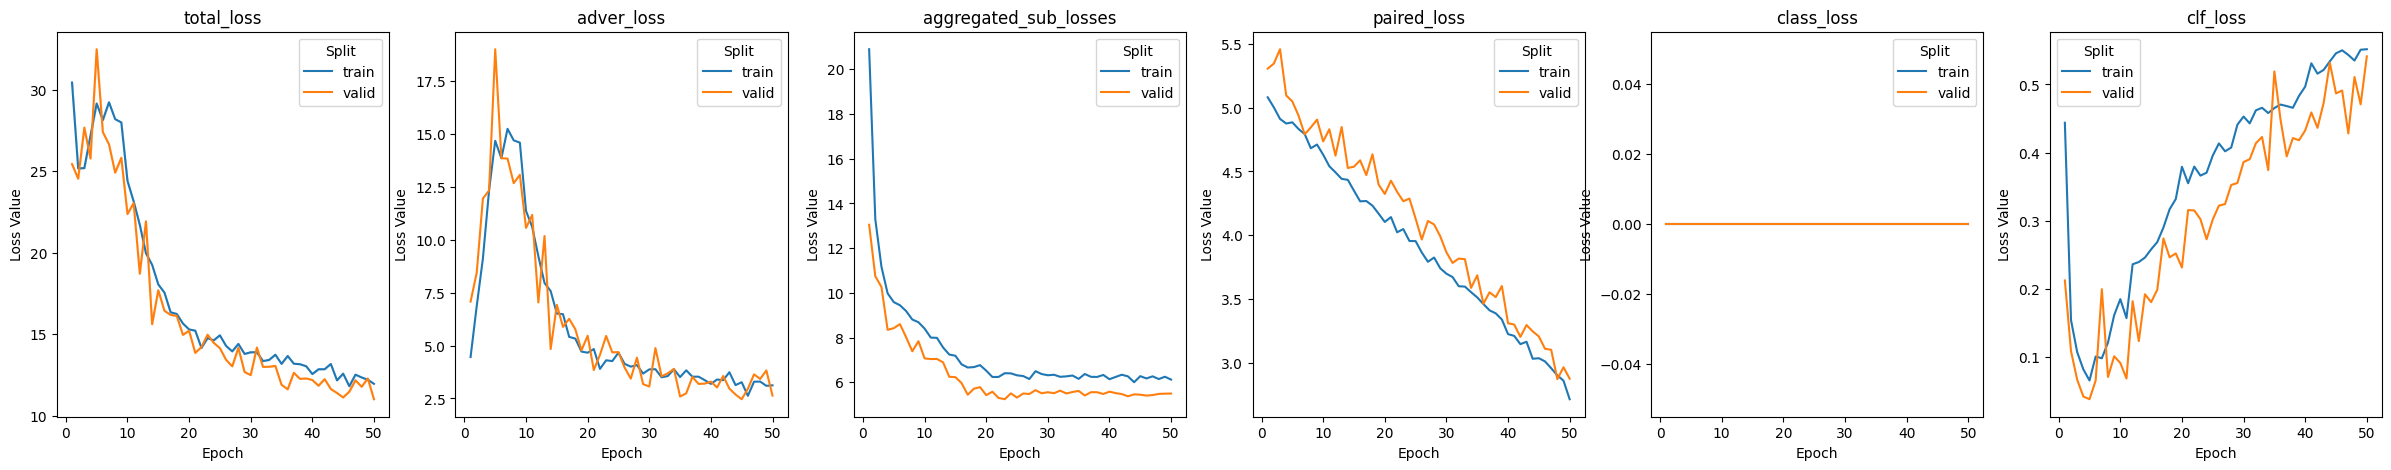

KeyError: 'user_label'

In [5]:
xmodalix.show_result()

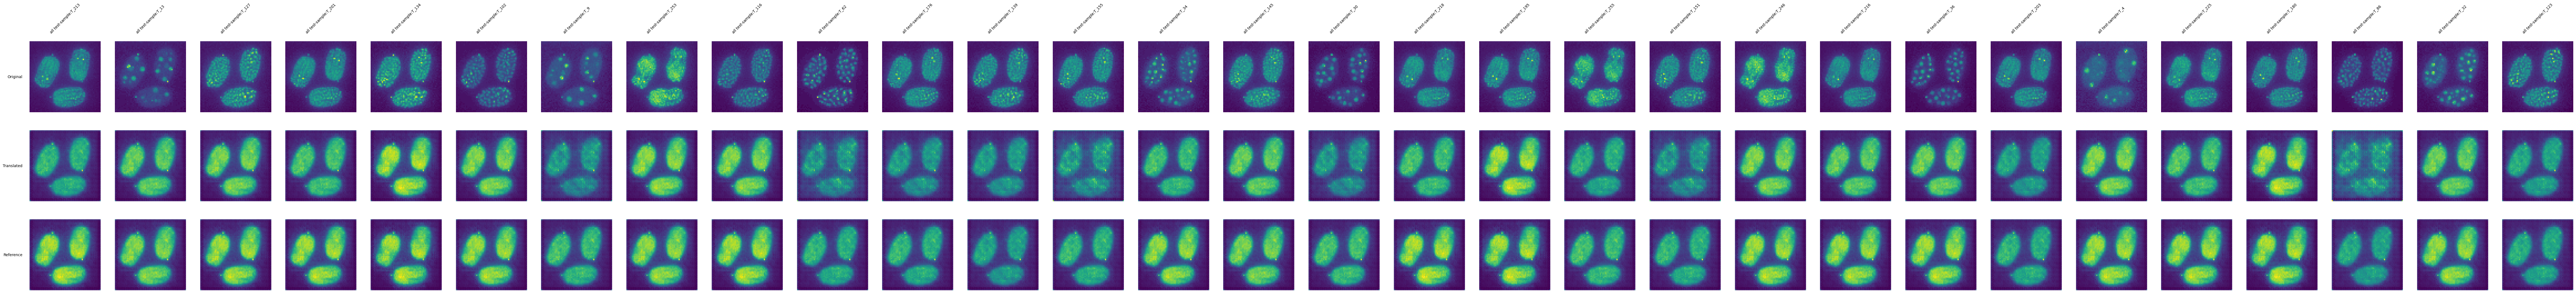

In [6]:
from autoencodix.utils._utils import find_translation_keys

dm_keys = find_translation_keys(config=xmodalix.config, trained_modalities=xmodalix._trainer._modality_dynamics.keys())

xmodalix._visualizer.show_image_translation(result=xmodalix.result, from_key=dm_keys["from"], to_key=dm_keys["to"], n_sample_per_class=30)

## ML embedding eval development

In [7]:
## Evaluate
from sklearn import linear_model
sklearn_ml_class = linear_model.LogisticRegression(
							solver="sag",
							n_jobs=-1,
							class_weight="balanced",
							max_iter=200,
) ## Support of all sklearn-like models
sklearn_ml_regression = linear_model.LinearRegression()
own_metric_class = 'roc_auc_ovr'  ## sklearn name of metrics: https://scikit-learn.org/stable/modules/model_evaluation.html#string-name-scorers
own_metric_regression = 'r2' 

xmodalix.evaluate(
	ml_model_class=sklearn_ml_class, # Default is sklearn LogisticRegression
	ml_model_regression=sklearn_ml_regression, # Default is sklearn LinearRegression
	params= ["early", "extra_class_labels"],	# No default? ... or all params in annotation?
	metric_class = own_metric_class, # Default is 'roc_auc_ovr'
	metric_regression = own_metric_regression, # Default is 'r2'
	reference_methods = ["PCA", "UMAP", "RandomFeature"], # Default [], no references? or all possible? or only PCA?
	split_type = "use-split", # Default is "use-split", other options: "CV-5", ... "LOOCV"?
)


Perform ML task with feature df: PCA_$_multi_bulk.RNA
Processing dataset: multi_bulk.RNA
Processing dataset: img.IMG
Processing dataset: multi_bulk.RNA
Processing dataset: img.IMG
Processing dataset: multi_bulk.RNA
Processing dataset: img.IMG
PCA_$_multi_bulk.RNA
Perform ML task with feature df: PCA_$_img.IMG
Processing dataset: multi_bulk.RNA
Processing dataset: img.IMG
Processing dataset: multi_bulk.RNA
Processing dataset: img.IMG
Processing dataset: multi_bulk.RNA
Processing dataset: img.IMG
PCA_$_img.IMG
Perform ML task with feature df: UMAP_$_multi_bulk.RNA
Processing dataset: multi_bulk.RNA
Processing dataset: img.IMG
Processing dataset: multi_bulk.RNA
Processing dataset: img.IMG
Processing dataset: multi_bulk.RNA
Processing dataset: img.IMG
UMAP_$_multi_bulk.RNA


/Users/maximilianjoas/development/autoencodix_package/.venv/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
/Users/maximilianjoas/development/autoencodix_package/.venv/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/maximilianjoas/development/autoencodix_package/.venv/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Perform ML task with feature df: UMAP_$_img.IMG
Processing dataset: multi_bulk.RNA
Processing dataset: img.IMG
Processing dataset: multi_bulk.RNA
Processing dataset: img.IMG
Processing dataset: multi_bulk.RNA
Processing dataset: img.IMG
UMAP_$_img.IMG


/Users/maximilianjoas/development/autoencodix_package/.venv/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Perform ML task with feature df: RandomFeature_$_multi_bulk.RNA
Processing dataset: multi_bulk.RNA
Processing dataset: img.IMG
Processing dataset: multi_bulk.RNA
Processing dataset: img.IMG
Processing dataset: multi_bulk.RNA
Processing dataset: img.IMG
RandomFeature_$_multi_bulk.RNA_R1
RandomFeature_$_multi_bulk.RNA_R2
RandomFeature_$_multi_bulk.RNA_R3
RandomFeature_$_multi_bulk.RNA_R4
RandomFeature_$_multi_bulk.RNA_R5
Perform ML task with feature df: RandomFeature_$_img.IMG
Processing dataset: multi_bulk.RNA
Processing dataset: img.IMG
Processing dataset: multi_bulk.RNA
Processing dataset: img.IMG
Processing dataset: multi_bulk.RNA
Processing dataset: img.IMG
RandomFeature_$_img.IMG_R1
RandomFeature_$_img.IMG_R2
RandomFeature_$_img.IMG_R3
RandomFeature_$_img.IMG_R4
RandomFeature_$_img.IMG_R5
Perform ML task with feature df: Latent_$_multi_bulk.RNA
Processing dataset: multi_bulk.RNA
Processing dataset: img.IMG
Processing dataset: multi_bulk.RNA
Processing dataset: img.IMG
Processing da

/Users/maximilianjoas/development/autoencodix_package/.venv/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/maximilianjoas/development/autoencodix_package/.venv/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Result Object Public Attributes:
------------------------------
latentspaces: TrainingDynamics object
sample_ids: TrainingDynamics object
reconstructions: TrainingDynamics object
mus: TrainingDynamics object
sigmas: TrainingDynamics object
losses: TrainingDynamics object
sub_losses: LossRegistry(_losses={'total_loss': TrainingDynamics(), 'adver_loss': TrainingDynamics(), 'aggregated_sub_losses': TrainingDynamics(), 'paired_loss': TrainingDynamics(), 'class_loss': TrainingDynamics(), 'multi_bulk.RNA.recon_loss': TrainingDynamics(), 'multi_bulk.RNA.var_loss': TrainingDynamics(), 'multi_bulk.RNA.anneal_factor': TrainingDynamics(), 'multi_bulk.RNA.effective_beta_factor': TrainingDynamics(), 'multi_bulk.RNA.loss': TrainingDynamics(), 'img.IMG.recon_loss': TrainingDynamics(), 'img.IMG.var_loss': TrainingDynamics(), 'img.IMG.anneal_factor': TrainingDynamics(), 'img.IMG.effective_beta_factor': TrainingDynamics(), 'img.IMG.loss': TrainingDynamics(), 'clf_loss': TrainingDynamics()})
preprocessed

In [8]:
xmodalix.result.embedding_evaluation

,score_split,CLINIC_PARAM,metric,value,ML_ALG,ML_TYPE,MODALITY,ML_TASK,ML_SUBTASK
0,train,early,roc_auc_ovr,1.000000,"LogisticRegression(class_weight='balanced', ma...",classification,multi_bulk.RNA,PCA,PCA_$_multi_bulk.RNA
1,valid,early,roc_auc_ovr,1.000000,"LogisticRegression(class_weight='balanced', ma...",classification,multi_bulk.RNA,PCA,PCA_$_multi_bulk.RNA
2,test,early,roc_auc_ovr,1.000000,"LogisticRegression(class_weight='balanced', ma...",classification,multi_bulk.RNA,PCA,PCA_$_multi_bulk.RNA
0,train,extra_class_labels,r2,0.998021,LinearRegression(),regression,multi_bulk.RNA,PCA,PCA_$_multi_bulk.RNA
1,valid,extra_class_labels,r2,0.998498,LinearRegression(),regression,multi_bulk.RNA,PCA,PCA_$_multi_bulk.RNA
...,...,...,...,...,...,...,...,...,...
1,valid,early,roc_auc_ovr,0.869565,"LogisticRegression(class_weight='balanced', ma...",classification,img.IMG,Latent,Latent_$_img.IMG
2,test,early,roc_auc_ovr,0.815419,"LogisticRegression(class_weight='balanced', ma...",classification,img.IMG,Latent,Latent_$_img.IMG
0,train,extra_class_labels,r2,0.744402,LinearRegression(),regression,img.IMG,Latent,Latent_$_img.IMG
1,valid,extra_class_labels,r2,0.723314,LinearRegression(),regression,img.IMG,Latent,Latent_$_img.IMG


Showing plot for ML algorithm: LogisticRegression(class_weight='balanced', max_iter=200, n_jobs=-1,
                   solver='sag')


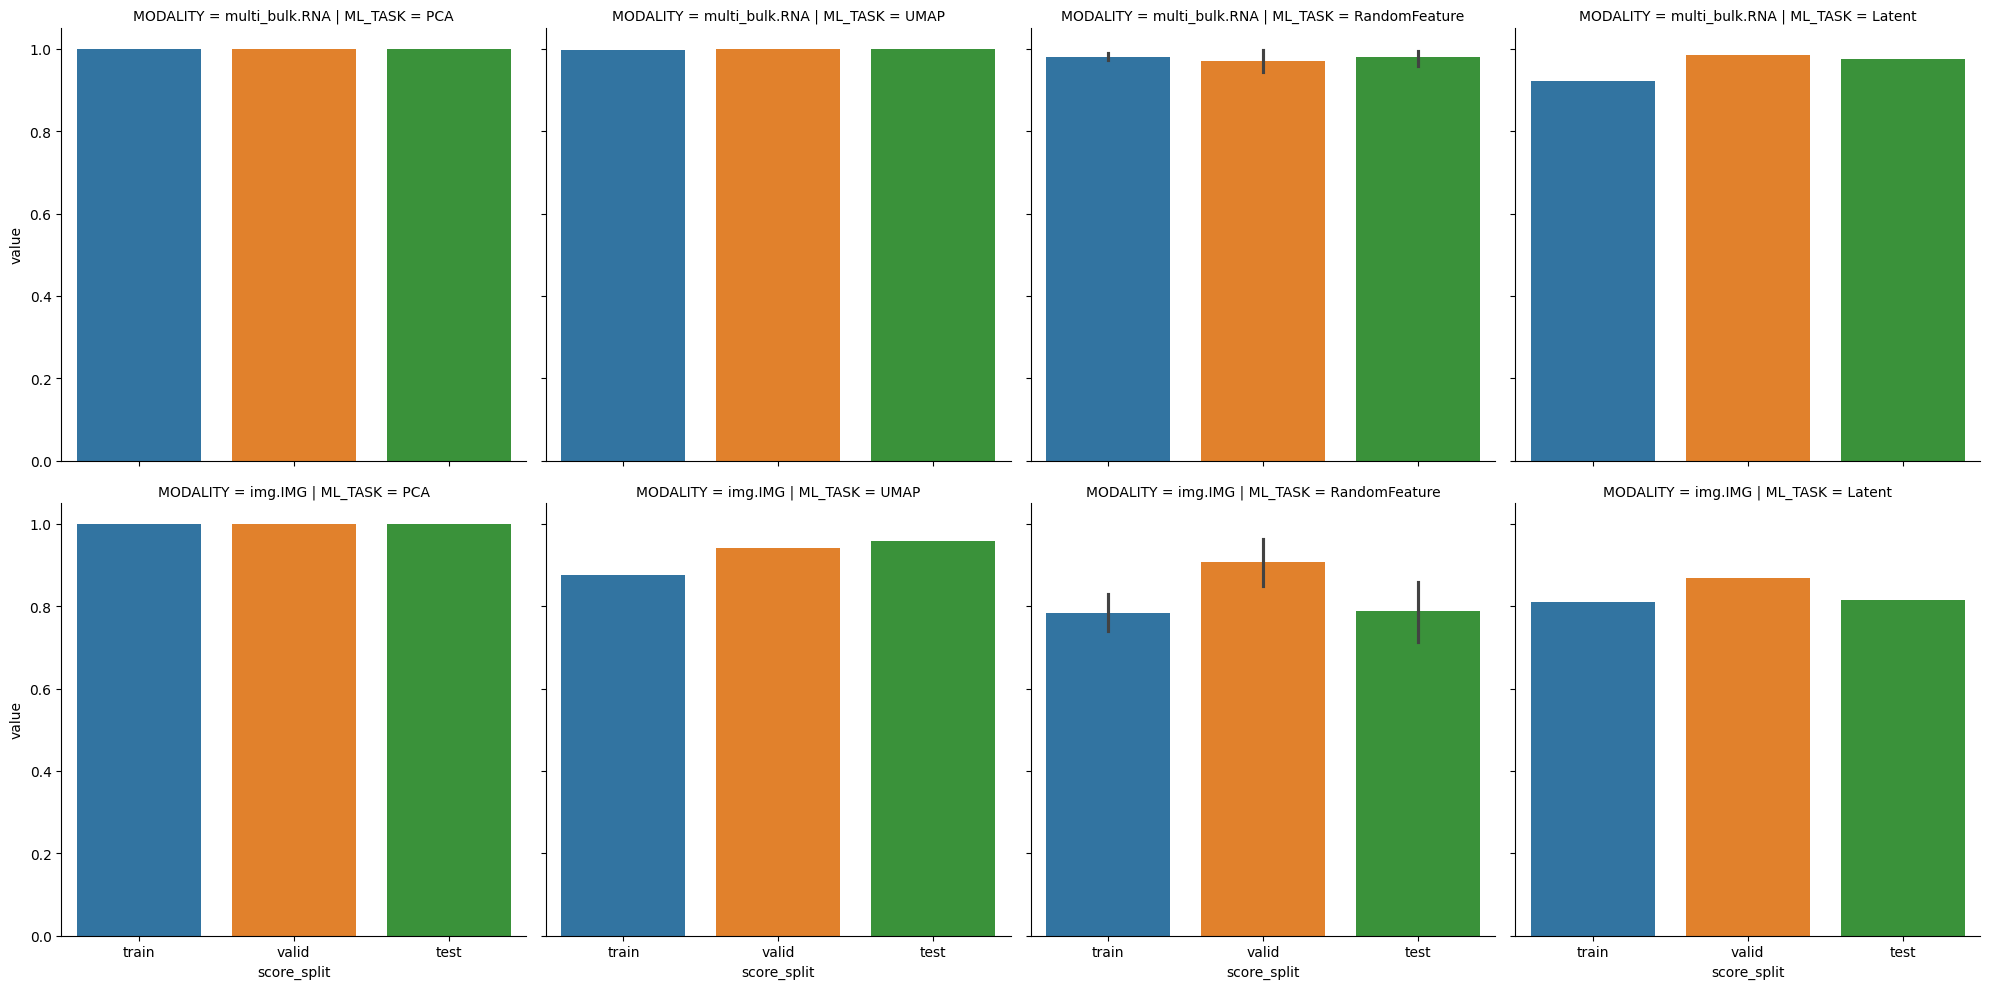

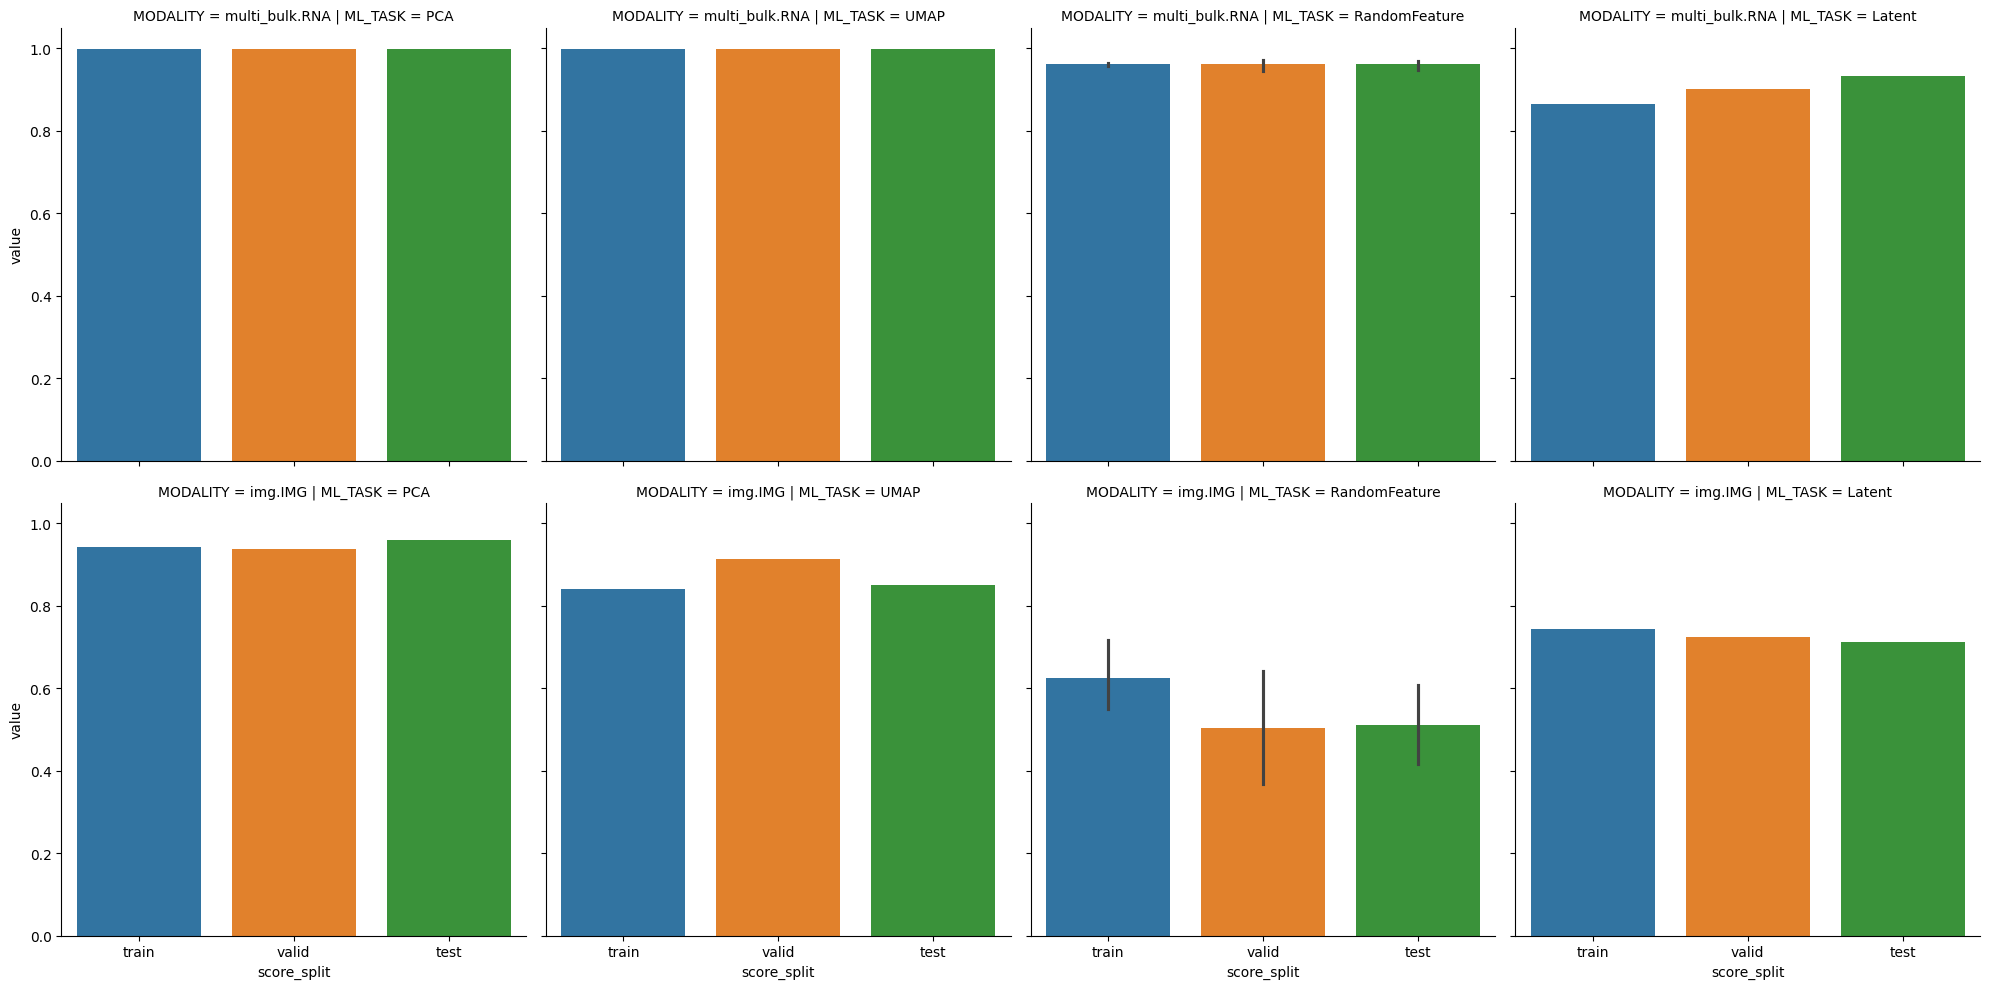

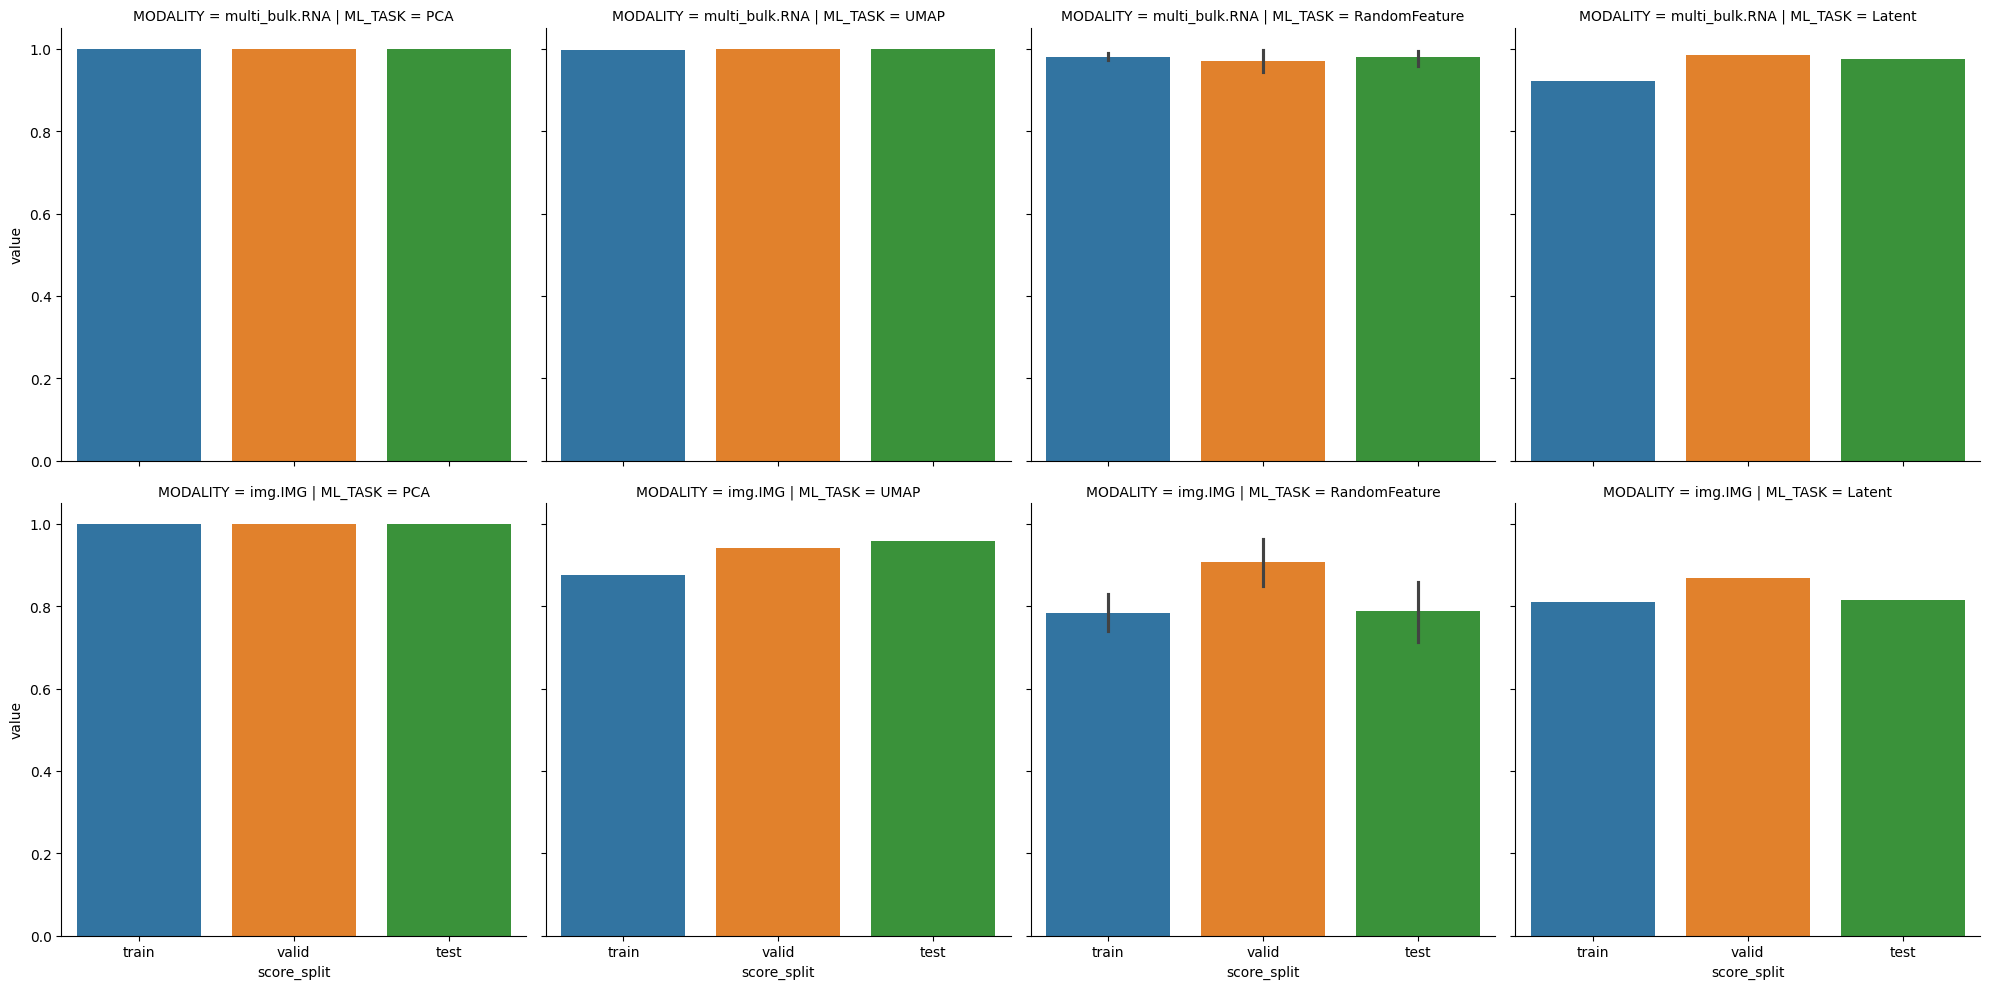

In [9]:
fig = xmodalix._visualizer.show_evaluation(
	param="early",
	metric="roc_auc_ovr"
)

## UMAP/PCA translation visualization

In [10]:
import pandas as pd

dataset = xmodalix.result.datasets

translated_modality = "img.IMG"

df_processed = pd.concat([
                    # dataset.train._to_df(modality=translated_modality),
                    dataset.test._to_df(modality=translated_modality),
                    # dataset.valid._to_df(modality=translated_modality),
                ])

df_processed.shape

(52, 4096)

In [11]:
# xmodalix.result.reconstructions.get(epoch=-1, split="train")["translation"] ## Translation only for test available
xmodalix.result.reconstructions.get(epoch=-1, split="test")["translation"].shape
## TODO unclear why it has different shape

(90, 1, 64, 64)

In [12]:
import torch 
# Get the list of tensors
tensor_list = xmodalix.result.reconstructions.get(epoch=-1, split="test")["translation"]

# Flatten each tensor and collect as rows
rows = [t.flatten().cpu().numpy() if isinstance(t, torch.Tensor) else t.flatten() for t in tensor_list]

# Create DataFrame
df_translate_flat = pd.DataFrame(rows, columns=["Pixel_" + str(i) for i in range(len(rows[0]))])

df_translate_flat.shape

(90, 4096)

In [13]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from umap import UMAP

task = "UMAP"

if task == "UMAP":
	reducer = UMAP(n_components=2)
elif task == "PCA":
	reducer = PCA(n_components=2)
elif task == "TSNE":
	reducer = TSNE(n_components=2)

df_red_comb = pd.DataFrame(reducer.fit_transform(
	pd.concat([df_processed, df_translate_flat], axis=0)
	))

df_red_comb.shape

df_red_comb["origin"]  = ["input"] * df_processed.shape[0] + ["translated"] * df_translate_flat.shape[0]

/Users/maximilianjoas/development/autoencodix_package/.venv/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [14]:
param = "early"

In [15]:
labels = list(xmodalix.result.datasets.test.datasets["img.IMG"].metadata[param]) * 2 

In [16]:
df_red_comb[param] = labels + labels[0:df_red_comb.shape[0]-len(labels)]  ## TODO fix for not matching lengths

In [17]:
# df_red_comb[param] = df_red_comb[param].astype(bool)

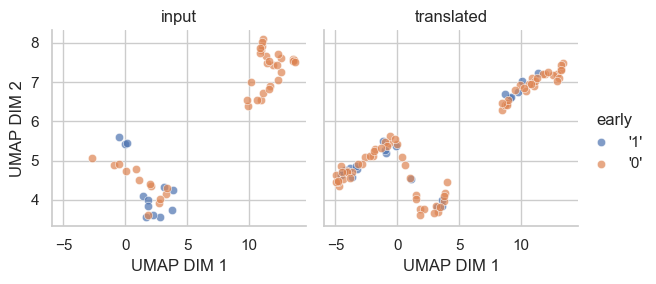

In [18]:
import seaborn as sns

import matplotlib.pyplot as plt

sns.set(style="whitegrid")
g = sns.FacetGrid(df_red_comb, col="origin", hue=param, sharex=True, sharey=True)
g.map_dataframe(sns.scatterplot, x=0, y=1, alpha=0.7 )
g.add_legend()
g.set_axis_labels(task+" DIM 1", task +" DIM 2")
g.set_titles(col_template="{col_name}")
plt.show()

/Users/maximilianjoas/development/autoencodix_package/.venv/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


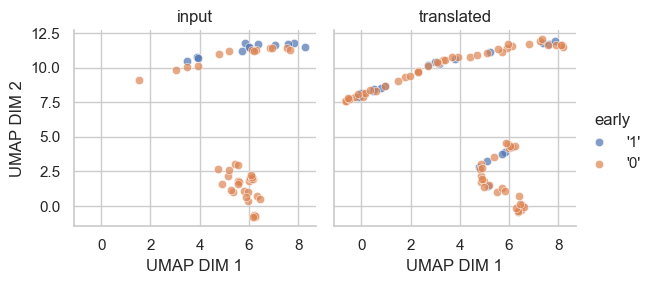

In [19]:
fig = xmodalix._visualizer.show_2D_translation(
	result=xmodalix.result,
	translated_modality=translated_modality,
	split="test",
	param="early",
	# param="extra_class_labels",
	reducer="UMAP",
)

## Recon error and VAE pure comparison

In [21]:
## Imagix (pure comparison)
from autoencodix.configs.default_config import DataCase

img_config2 = img_config # Copy from x-modalix

img_config2.data_case = DataCase.IMG_TO_IMG

img_config2.data_config=DataConfig(
        data_info={
            "IMG": DataInfo(
                file_path=IMGROOT,
				scaling="MINMAX",
                data_type="IMG",
            ),
            "ANNO": DataInfo(
                file_path=IMGMAPPING,
                data_type="ANNOTATION",
            ),
        },
    )
img_config2.beta = 0.01

In [22]:
imagix = acx.Imagix(config=img_config2)
imagix.run()

preprocessing
--------------
img to img CASE =============
Checking data type: IMG
Found image type in config
current data info: file_path='../data/images/ALY-2_SYS721/' data_type='IMG' scaling='MINMAX' filtering='VAR' sep=None extra_anno_file=None is_single_cell=False min_cells=0.05 min_genes=0.02 selected_layers=['X'] is_X=False normalize_counts=True log_transform=True k_filter=20 img_root=None img_width_resize=64 img_height_resize=64 translate_direction=None pretrain_epochs=0
Checking data type: ANNO
Given image size is possible, rescaling images to: 64x64
reading annotation file: ../data/ALY-2_SYS721_mappings.txt
Successfully loaded 260 images for IMG
calling normalize image in _process_ing_to_img_case
--- Running Pairing-Aware Split ---
Identified 260 fully paired samples across all modalities.
Identified 0 samples present in at least one, but not all, modalities.
Successfully generated synchronized indices for all modalities.
Converting 182 images to torch.float32 tensors...
Conv

/Users/maximilianjoas/development/autoencodix_package/src/autoencodix/utils/_imgreader.py:251: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support sep=None with delim_whitespace=False; you can avoid this warning by specifying engine='python'.
  annotation = pd.read_csv(anno_file, sep=sep)


Epoch 1 - Train Loss: 94944.7832
Sub-losses: recon_loss: 93863.6045, var_loss: 1081.1784, anneal_factor: 0.0000, effective_beta_factor: 0.0000
Epoch 1 - Valid Loss: 21944.5879
Sub-losses: recon_loss: 21340.1660, var_loss: 604.4219, anneal_factor: 0.0000, effective_beta_factor: 0.0000
Epoch 2 - Train Loss: 65195.3945
Sub-losses: recon_loss: 61201.7598, var_loss: 3993.6343, anneal_factor: 0.0001, effective_beta_factor: 0.0000
Epoch 2 - Valid Loss: 19494.1641
Sub-losses: recon_loss: 16949.8340, var_loss: 2544.3296, anneal_factor: 0.0001, effective_beta_factor: 0.0000
Epoch 3 - Train Loss: 42284.9795
Sub-losses: recon_loss: 36679.1509, var_loss: 5605.8283, anneal_factor: 0.0001, effective_beta_factor: 0.0000
Epoch 3 - Valid Loss: 6667.4868
Sub-losses: recon_loss: 6102.4121, var_loss: 565.0746, anneal_factor: 0.0001, effective_beta_factor: 0.0000
Epoch 4 - Train Loss: 21464.3363
Sub-losses: recon_loss: 21450.2803, var_loss: 14.0559, anneal_factor: 0.0002, effective_beta_factor: 0.0000
Epoch

Result Object Public Attributes:
------------------------------
latentspaces: TrainingDynamics object
sample_ids: TrainingDynamics object
reconstructions: TrainingDynamics object
mus: TrainingDynamics object
sigmas: TrainingDynamics object
losses: TrainingDynamics object
sub_losses: LossRegistry(_losses={'recon_loss': TrainingDynamics(), 'var_loss': TrainingDynamics(), 'anneal_factor': TrainingDynamics(), 'effective_beta_factor': TrainingDynamics()})
preprocessed_data: Tensor of shape (0,)
model: ImageVAEArchitecture
model_checkpoints: TrainingDynamics object
datasets: DatasetContainer(train=<autoencodix.data._image_dataset.ImageDataset object at 0x401255210>, valid=<autoencodix.data._image_dataset.ImageDataset object at 0x400dd6350>, test=<autoencodix.data._image_dataset.ImageDataset object at 0x400dd62c0>)
new_datasets: DatasetContainer(train=None, valid=None, test=None)
adata_latent: AnnData object with n_obs × n_vars = 52 × 8
    uns: 'var_names'
final_reconstruction: <autoencodix.

Creating plots ...


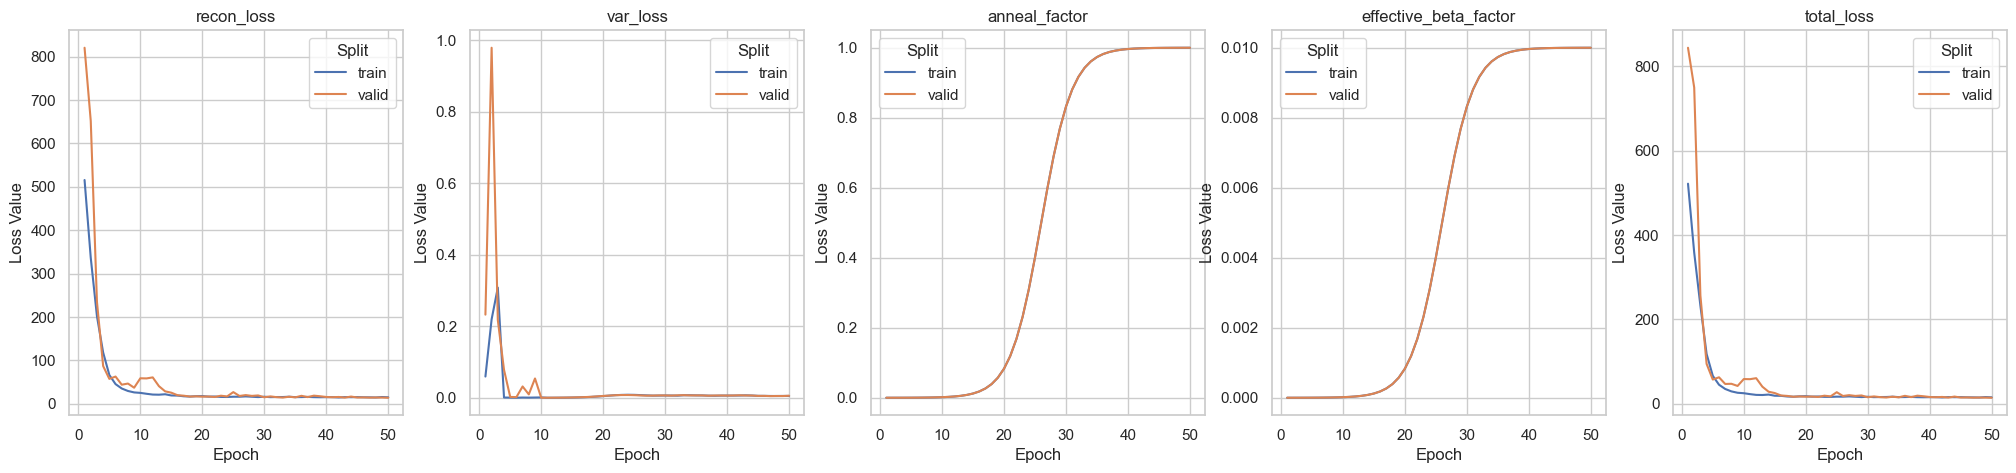

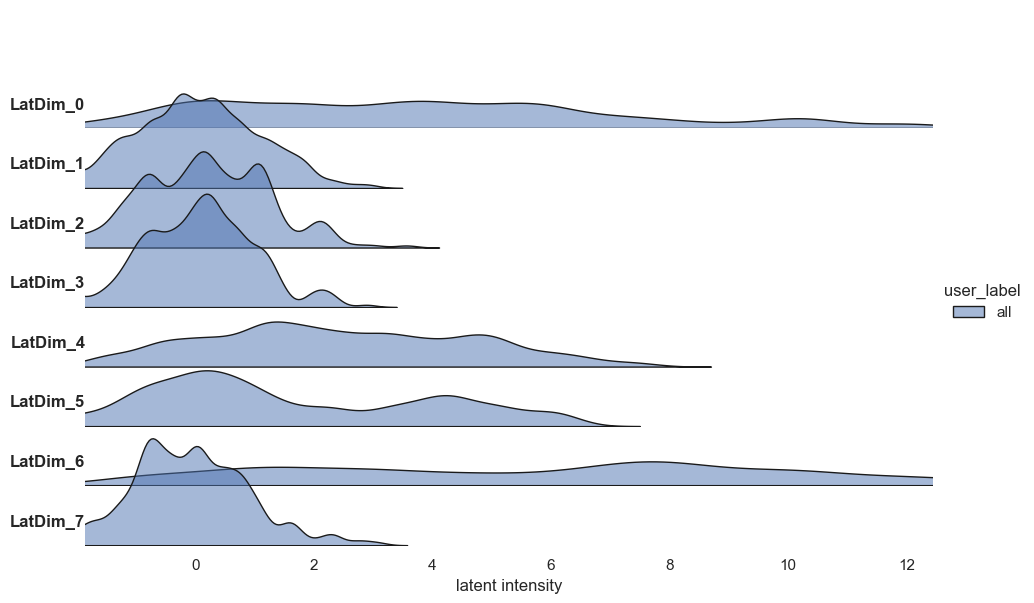

/Users/maximilianjoas/development/autoencodix_package/.venv/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


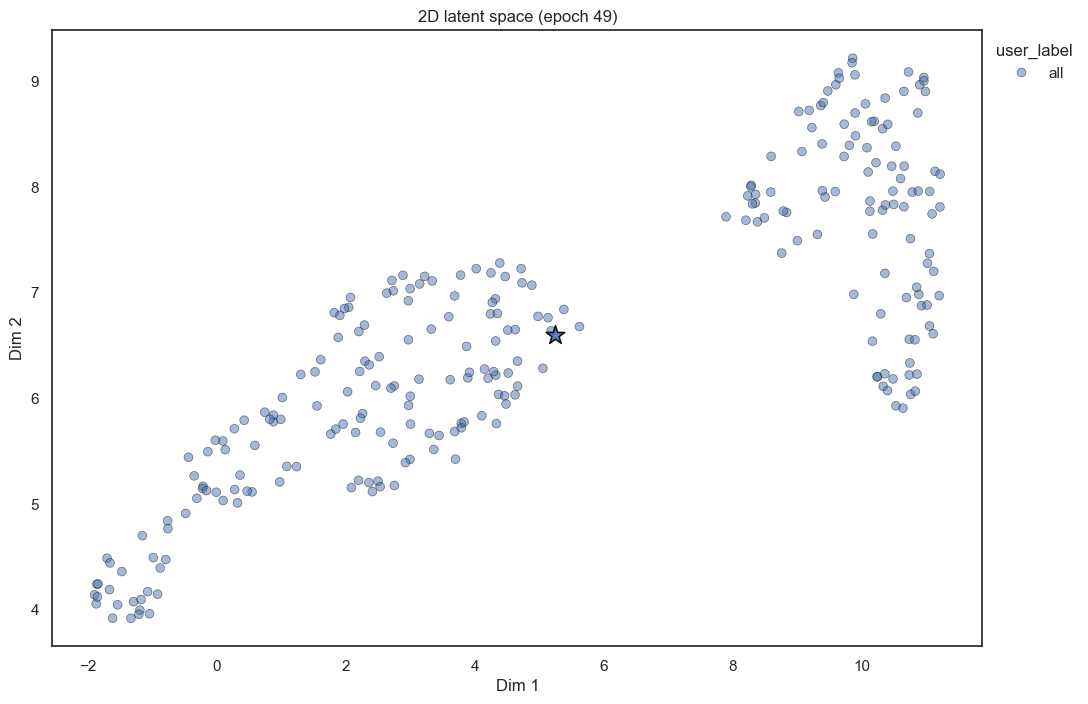

In [23]:
imagix.show_result()

In [24]:
imagix._visualizer.show_image_recon_grid(result=imagix.result)

AttributeError: 'DataFrame' object has no attribute 'sample_ids'

In [ ]:
param = "early"
fig, df_comparison = xmodalix._evaluator.pure_vae_comparison(
	xmodalix_result = xmodalix.result,
	pure_vae_result = imagix.result,
	to_key = "img.IMG",
	param = param
)

xmodalix._visualizer.plots["PureVAEComparison"][param] = fig
fig.figure